The data set is called MINST data set.

In [1]:
# Importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [2]:
# Loading the MINST dataset
minst = tf.keras.datasets.mnist.load_data()

# Split into training and testing sets
(x_train, y_train),(x_test, y_test) = minst

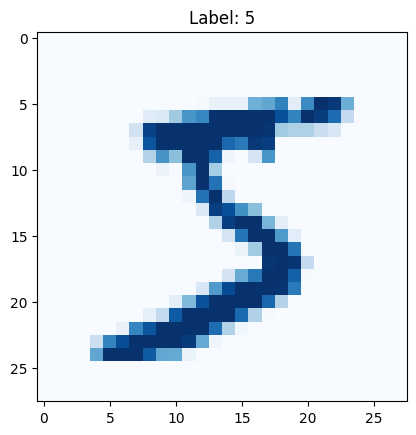

In [3]:
# Showing the first image with it's label
plt.imshow(x_train[0], cmap='Blues')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [4]:
# Preprocess the data
# Reshape the features into 1D array
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

#Normalizing the pixel values to range from 0 to 1
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
# converting labels to categorical one-hot-encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# Building a deep neural network model

model = tf.keras.Sequential([
    Dense(256, activation='relu', input_shape=(784,)),  # First hidden layer
    BatchNormalization(),
    Dropout(0.3),                                        # To prevent overfitting

    Dense(128, activation='relu'),                       # Second hidden layer
    BatchNormalization(),
    Dropout(0.3),                                        # to prevent overfitting

    Dense(64, activation='relu'),                        # Third hidden layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation='softmax')                      # output layer(10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model_hist = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data = (x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7650 - loss: 0.7554 - val_accuracy: 0.9542 - val_loss: 0.1495
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9368 - loss: 0.2118 - val_accuracy: 0.9676 - val_loss: 0.1152
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9526 - loss: 0.1601 - val_accuracy: 0.9718 - val_loss: 0.0880
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9611 - loss: 0.1287 - val_accuracy: 0.9740 - val_loss: 0.0849
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9663 - loss: 0.1121 - val_accuracy: 0.9751 - val_loss: 0.0808
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9703 - loss: 0.0972 - val_accuracy: 0.9764 - val_loss: 0.0783
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9722 - loss: 0.0919 - val_accuracy: 0.9786 - val_loss: 0.0749
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9742 - loss: 0.0823 - val_acc

In [8]:
# Model Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9775 - loss: 0.0751
Test Accuracy: 0.9808


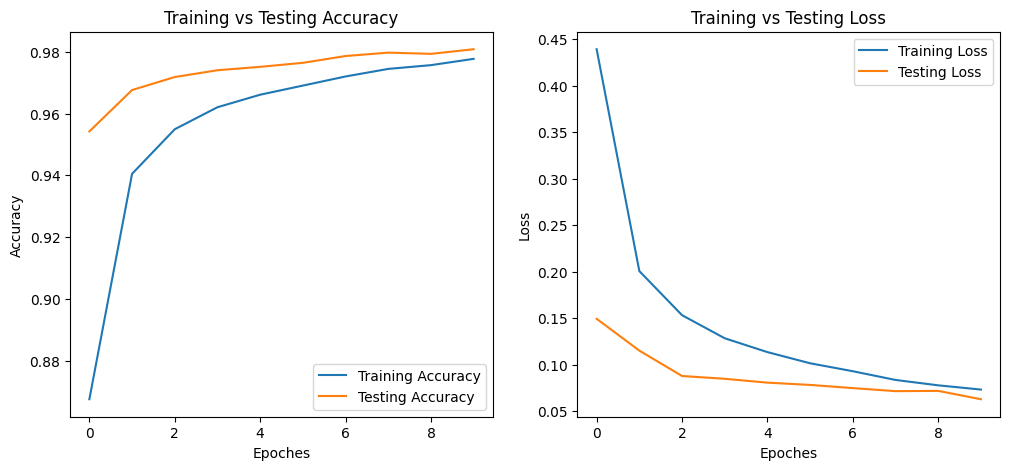

In [9]:
# Plotting Accuracy and loss function
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(model_hist.history['accuracy'], label='Training Accuracy')
plt.plot(model_hist.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Testing Accuracy")

plt.subplot(1, 2, 2)
plt.plot(model_hist.history['loss'], label='Training Loss')
plt.plot(model_hist.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Testing Loss")

plt.show()

With this we can say the model is actually performing quite well.
Hence we can say the model is an excellent model with 98% accuracy.

Thank you for going through this till the end, feel free to get in touch if you have any questions... :)